In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Numerical approximation for simple harmonic oscillator (4 points)

Create a numerical approximation of the simple harmonic oscillator using the Euler method. Visualize different approximations as a function of the step size. The ODE function is given.

In [2]:
def simple_harmonic_oscillator(X, w0):
    """
    Simple harmonic oscillator model
    X: state vector [x, xdot]
    w0: omega
    """
    
    return np.array([X[1], -w0**2 * X[0]])

In [58]:
def sho_approximater(X, w0, t, dt):
    """
    Euler method approximation
    X: state vector [x, xdot]
    w0: omega
    dt: delta_t
    """
    
    #fx = math.cos(w0 * t) - math.sin(w0 * t)
    fx = simple_harmonic_oscillator(X, w0)
    return np.array([X[0] + dt * fx[0], X[1] + dt * fx[1]])

In [63]:
def sho_approximation(dt):
    X = [-1, -1]  # initial position/speed
    w0 = 1
    t = 0
    n = int(30 / dt)
    A = X[0]
    B = X[1] / w0

    true_xs = np.empty(n)
    app_xs = np.empty(n)

    for i in range(n):
        #X = [sho_approximater(X[0], w0, t, dt), sho_approximater(X[1], w0, t, dt)]
        X = sho_approximater(X, w0, t, dt)
        true_xs[i] = A * math.cos(w0 * t) + math.sin(w0 * t)
        app_xs[i] = X[1]
        t = t + dt

    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(0, 30, dt), true_xs, label="analytical")
    plt.plot(np.arange(0, 30, dt), app_xs, label="Euler approximation")
    plt.title("Harmonic Oscillator approximation using the forward Euler method")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend(loc='upper right')
    plt.show()

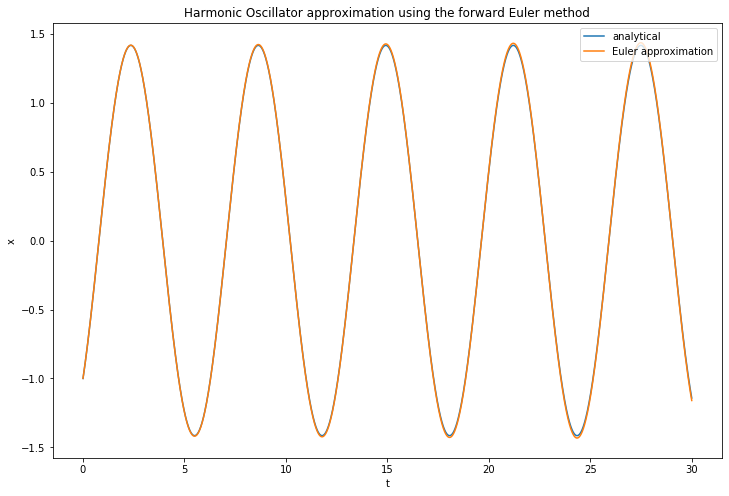

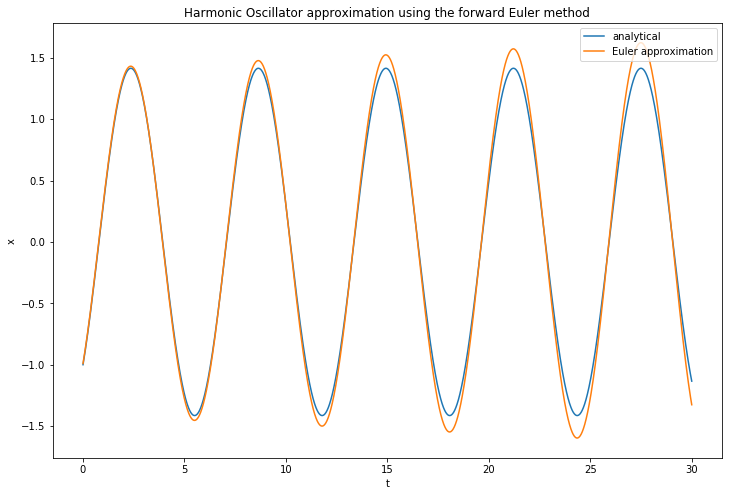

In [65]:
sho_approximation(0.001)
sho_approximation(0.01)

As we can see, the approximation already has imperfections with dt = 0.01, meaning it is easy but not very precise

### Lotka-Volterra model (3 points)

Simulate the Lotka-Volterra model using the Euler approximation. Visualize the population dynamics for predator and prey.

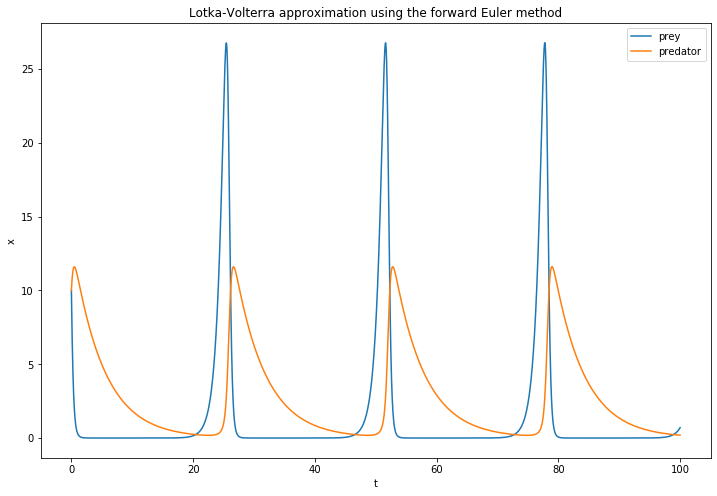

In [88]:
def fx(x, y):
    alpha = 1.10
    beta = 0.4
    return alpha * x - beta * x * y
def fy(x, y):
    gamma = 0.2
    delta = 0.1
    return delta * x * y - gamma * y

def euler(x, y, t, dt):
    return (x + dt * fx(x, y), y + dt * fy(x, y))

dt = 0.0001
x = 10
y = 10

t = 0
n = int(100 / dt)
xs = np.empty(n)
ys = np.empty(n)

for i in range(n):
    x, y = euler(x, y, t, dt)
    xs[i] = x
    ys[i] = y
    t = t + dt
    
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, 100, dt), xs, label="prey")
plt.plot(np.arange(0, 100, dt), ys, label="predator")
plt.title("Lotka-Volterra approximation using the forward Euler method")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(loc='upper right')
plt.show()

### 2D Brownian motion (3 points)

Create a 2D Brownian motion simulation using the Euler-Maruyama method.


In [109]:
def em(x, t, dt):
    """
    dx = f(x, t)dt + F(x, t)dw
    x_n+1 = x_n + dt * f(x_n, t_n) + F(x_n, t_n) * dw_n
    """
    dw = np.random.normal(0, dt * np.identity(2))
    fx = math.cos(t) + math.sin(t)
    Fx = 1
    return x + dt * fx + Fx * dw

w = 0
x = 1
dt = 0.01
t = 0
n = int(30 / 0.01)
xs = np.empty((n, 2, 2))

for i in range(n):
    x = em(x, t, dt)
    xs[i] = x
    t = t + dt

This last one I had no clue what f or F should be, as the slides only mentioned the random pull. On top of that plotting a shape (3000, 2, 2) also won't be easy so I think I'm missing something here.